In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', None)

In [8]:
df = pd.read_csv("/content/sample_data/Data_Train.csv")

In [9]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("\n##################### Columns #####################")
    print(dataframe.columns)
    print("\n##################### Info #####################")
    dataframe.info()
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [10]:
check_df(df)

##################### Shape #####################
(10683, 11)

##################### Columns #####################
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 1

In [11]:
df.sample()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8909,Jet Airways,9/05/2019,Kolkata,Banglore,CCU ? DEL ? BLR,09:35,22:05,12h 30m,1 stop,No info,14151


In [12]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [48]:
# @title Variable Description

# Airline            : Airline where the plane will take off
# Date_of_Journey    : Date of the flight
# Source             : City where the plane will take off
# Destination        : City where the plane will land
# Route              : All of the rotues of the flight
# Dep_Time           : Departure time of the flight
# Arrival_Time       : Arrivial time of the flight
# Duration           : Duration of the flight
# Total_Stops        : Number of the total stop
# Additional_Info    : Info about the flight
# Price              : Price of the flight

In [14]:
def column_detection(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n##################### Categoric #####################")
    print(cat_cols)
    print("\n##################### Numeric #####################")
    print(num_cols)
    print("\n##################### Categoric But Cardinal #####################")
    print(cat_but_car)
    print("\n##################### Numeric But Categoric #####################")
    print(num_but_cat)
    print("\n##################### Columns Overview #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [15]:
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)


##################### Categoric #####################
['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

##################### Numeric #####################
['Price']

##################### Categoric But Cardinal #####################
['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration']

##################### Numeric But Categoric #####################
[]

##################### Columns Overview #####################
Observations: 10683
Variables: 11
cat_cols: 5
num_cols: 1
cat_but_car: 5
num_but_cat: 0


                                   Airline      Ratio
Airline                                              
Jet Airways                           3849  36.029205
IndiGo                                2053  19.217448
Air India                             1752  16.399888
Multiple carriers                     1196  11.195357
SpiceJet                               818   7.657025
Vistara                                479   4.483759
Air Asia                               319   2.986053
GoAir                                  194   1.815969
Multiple carriers Premium economy       13   0.121689
Jet Airways Business                     6   0.056164
Vistara Premium economy                  3   0.028082
Trujet                                   1   0.009361


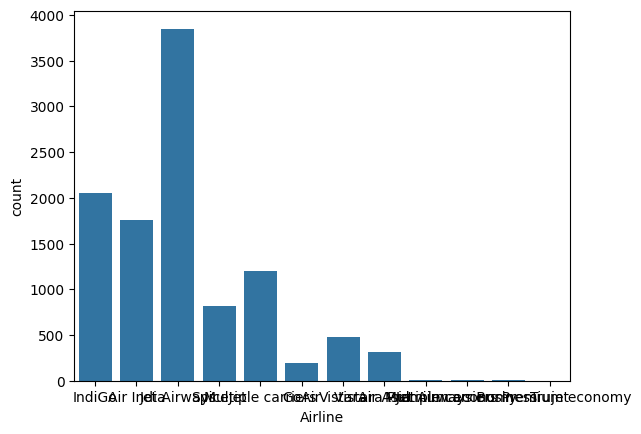

          Source      Ratio
Source                     
Delhi       4537  42.469344
Kolkata     2871  26.874473
Banglore    2197  20.565384
Mumbai       697   6.524385
Chennai      381   3.566414


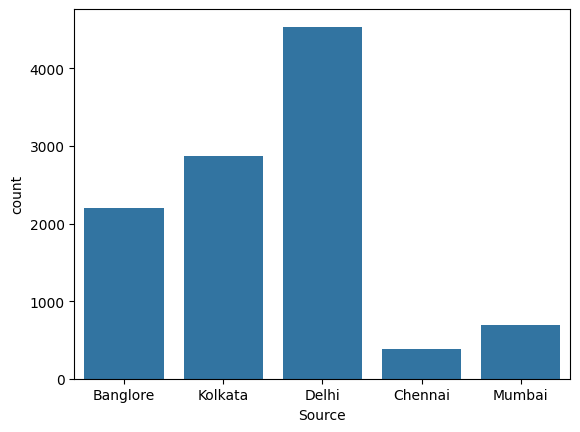

             Destination      Ratio
Destination                        
Cochin              4537  42.469344
Banglore            2871  26.874473
Delhi               1265  11.841243
New Delhi            932   8.724141
Hyderabad            697   6.524385
Kolkata              381   3.566414


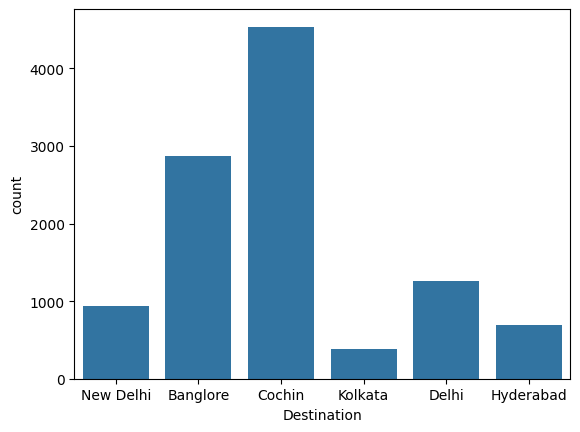

             Total_Stops      Ratio
Total_Stops                        
1 stop              5625  52.653749
non-stop            3491  32.678087
2 stops             1520  14.228213
3 stops               45   0.421230
4 stops                1   0.009361


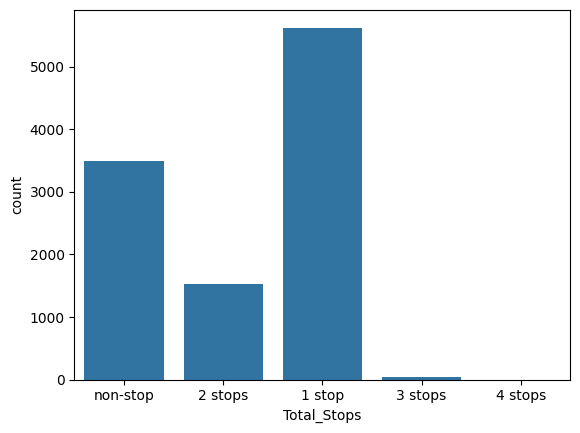

                              Additional_Info      Ratio
Additional_Info                                         
No info                                  8345  78.114762
In-flight meal not included              1982  18.552841
No check-in baggage included              320   2.995413
1 Long layover                             19   0.177853
Change airports                             7   0.065525
Business class                              4   0.037443
No Info                                     3   0.028082
1 Short layover                             1   0.009361
Red-eye flight                              1   0.009361
2 Long layover                              1   0.009361


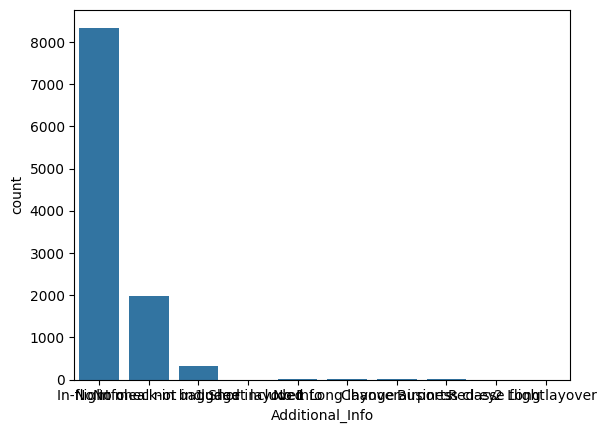

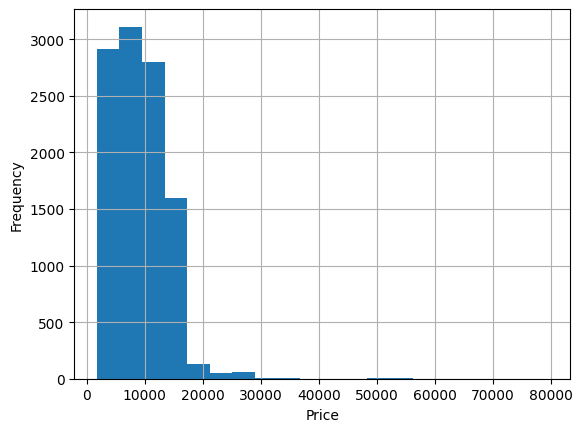

In [16]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


for col in cat_cols:
    cat_summary(df, col)


def hist_num_columns_show(dataframe, num_column):
    dataframe[num_column].hist(bins=20)
    plt.xlabel(num_column)
    plt.ylabel("Frequency")
    plt.show(block=True)


for num_col in num_cols:
    hist_num_columns_show(df, num_col)

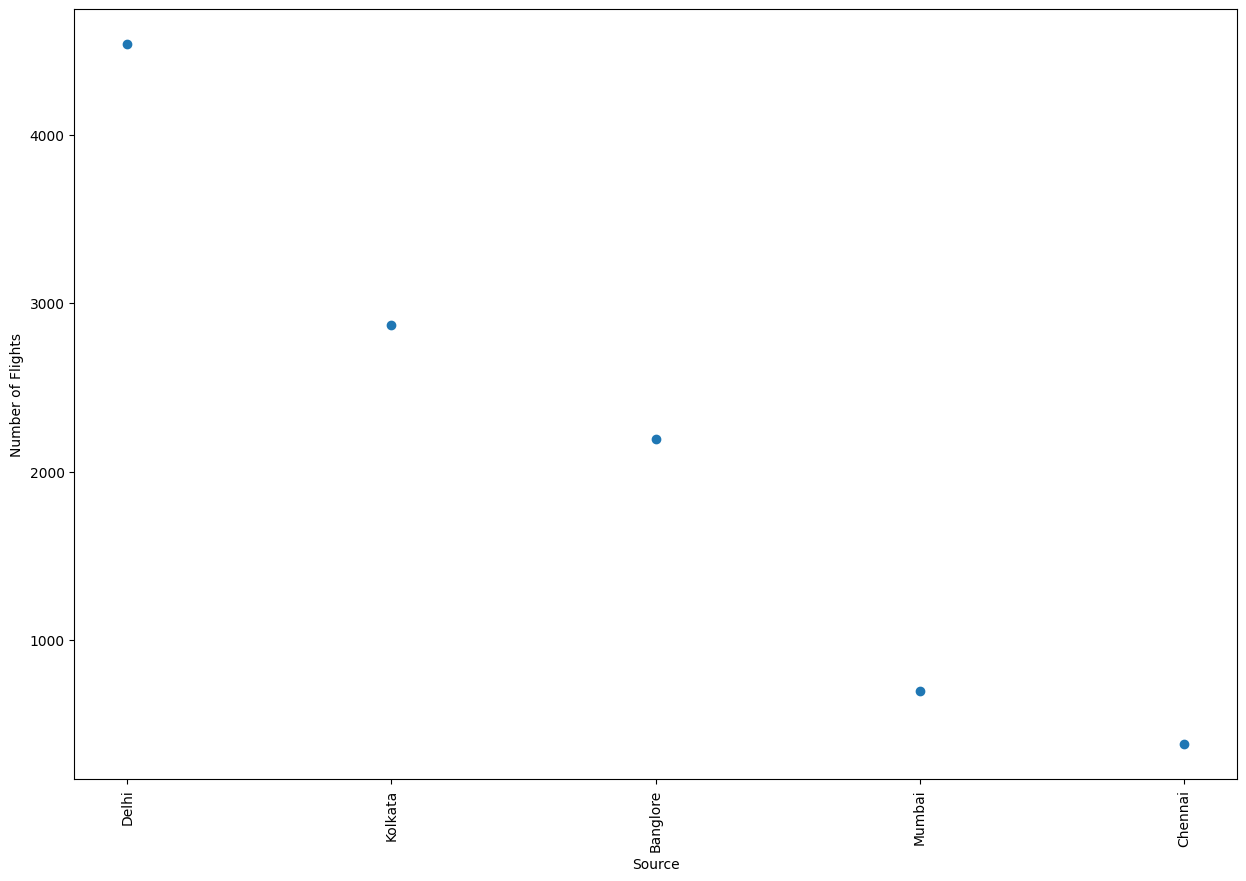

In [31]:
country_flight_counts = df['Source'].value_counts()

plt.figure(figsize=(15,10))
plt.scatter(country_flight_counts.index, country_flight_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Source')
plt.ylabel('Number of Flights')
plt.show()

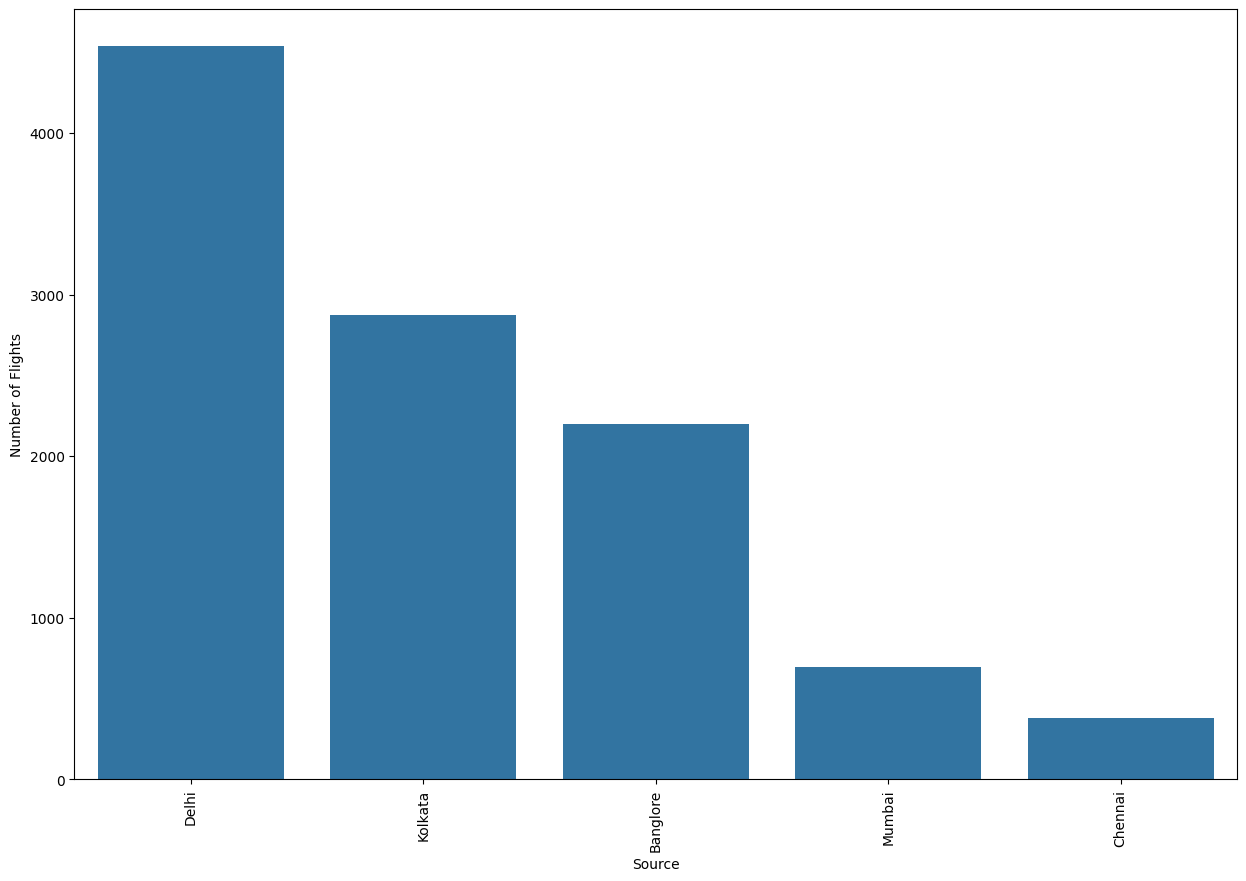

In [35]:
plt.figure(figsize=(15,10))
sns.barplot(x=country_flight_counts.index, y=country_flight_counts.values)
plt.xticks(rotation= 90)
plt.xlabel('Source')
plt.ylabel('Number of Flights')
plt.show()

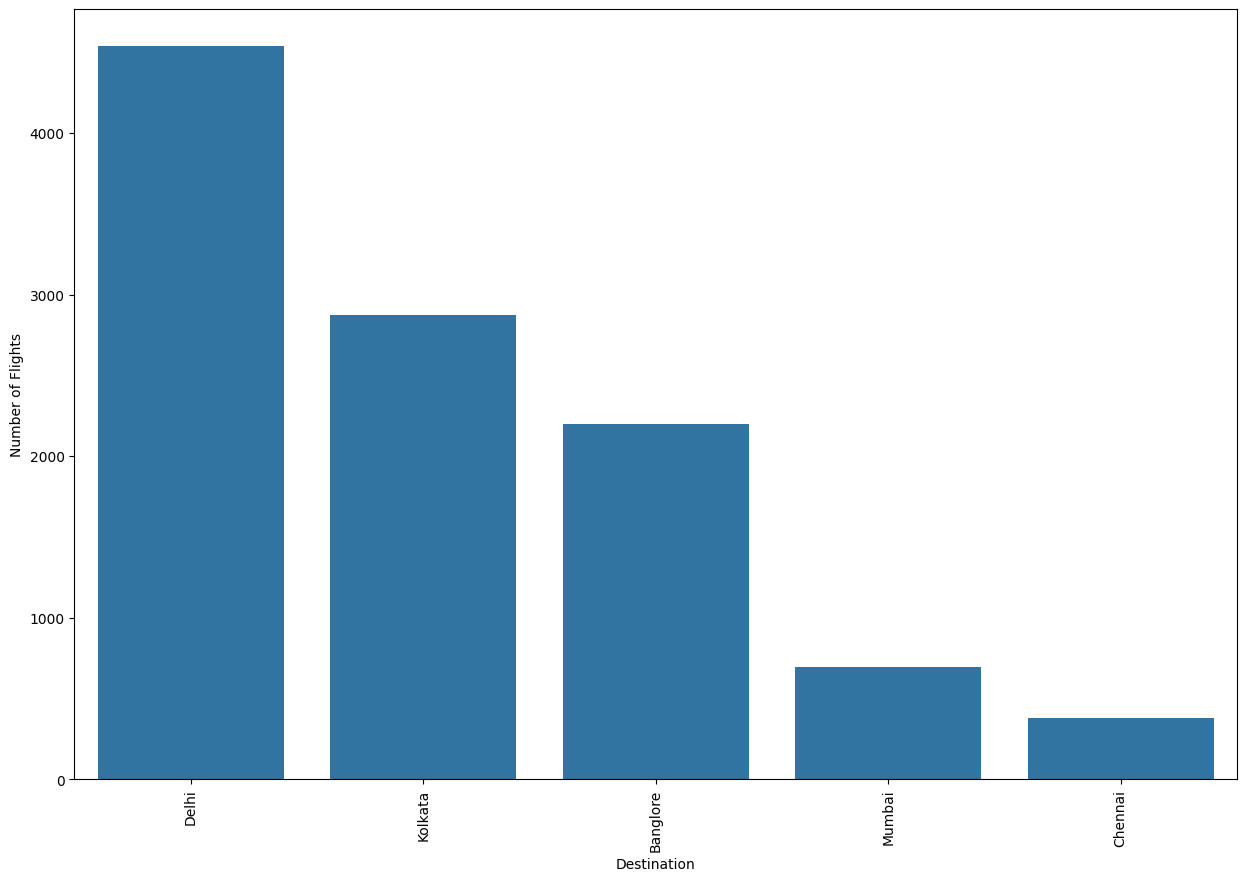

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(x=country_flight_counts.index, y=country_flight_counts.values)
plt.xticks(rotation= 90)
plt.xlabel('Destination')
plt.ylabel('Number of Flights')
plt.show()

In [53]:
# Total_Stops - Price
fig = px.bar(df, x='Total_Stops', y='Price', color = "Price")
fig.show()

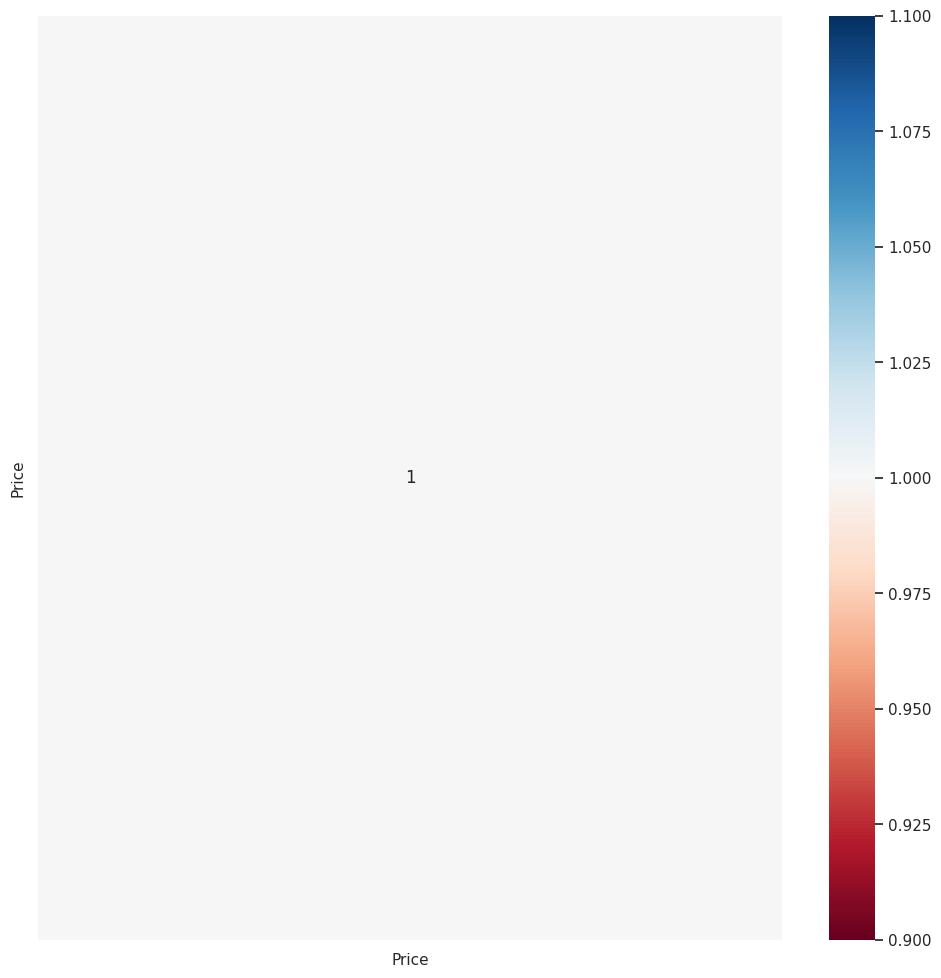

In [50]:
corr = df[num_cols].corr()

# Korelasyon haritasını oluşturma
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True)  # annot=True ile korelasyon değerlerini göster
plt.show()

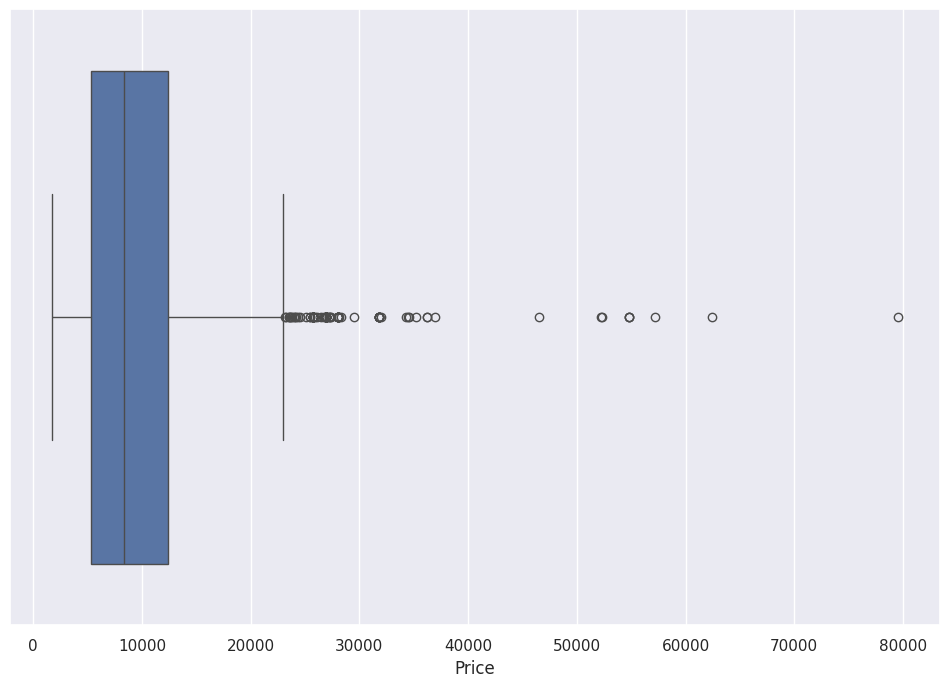

In [49]:
# Grafik Teknikle Aykırı Değerler
plt.figure(figsize=(12,8))
sns.boxplot(x=df["Price"])
plt.show(block=True)

In [43]:
def outlier_thresholds(dataframe: pd.DataFrame, col_name: str, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [44]:
outlier_thresholds(df,"Price")

(-5367.0, 23017.0)

In [45]:
def check_outlier(dataframe: pd.DataFrame, col_name: str):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(
            axis=None):
        return True
    else:
        return False

In [46]:
check_outlier(df,"Price")


True

In [47]:
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64